| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Análise Exploratória

In [2]:
df_hist = pd.read_csv('data/hist_diamonds.csv')
df_hist

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [3]:
df_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48940.0,0.797817,0.474126,0.2,0.40,0.70,1.04,5.01
depth,48940.0,61.751931,1.430026,43.0,61.00,61.80,62.50,79.00
table,48940.0,57.451161,2.233450,43.0,56.00,57.00,59.00,95.00
price,48940.0,3934.409644,3989.333861,326.0,949.00,2401.00,5331.25,18823.00
x,48940.0,5.730712,1.121920,0.0,4.71,5.69,6.54,10.74
y,48940.0,5.734333,1.145344,0.0,4.72,5.71,6.54,58.90
z,48940.0,3.538648,0.706817,0.0,2.91,3.52,4.04,31.80


#### Dropando as linhas que cujos valores de x, y ou z estejam zerados:

In [4]:
df_hist.loc[(df_hist['x'] == 0) | (df_hist['y'] == 0) | (df_hist['z'] == 0)]
df_hist = df_hist[(df_hist[['x', 'y', 'z']] != 0).all(axis = 1)].reset_index()
df_hist = df_hist.drop('index', axis=1)
df_hist.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


#### checando as correlações:

In [5]:
df_hist.corr().price

carat    0.922176
depth   -0.012135
table    0.127936
price    1.000000
x        0.887895
y        0.866545
z        0.867529
Name: price, dtype: float64

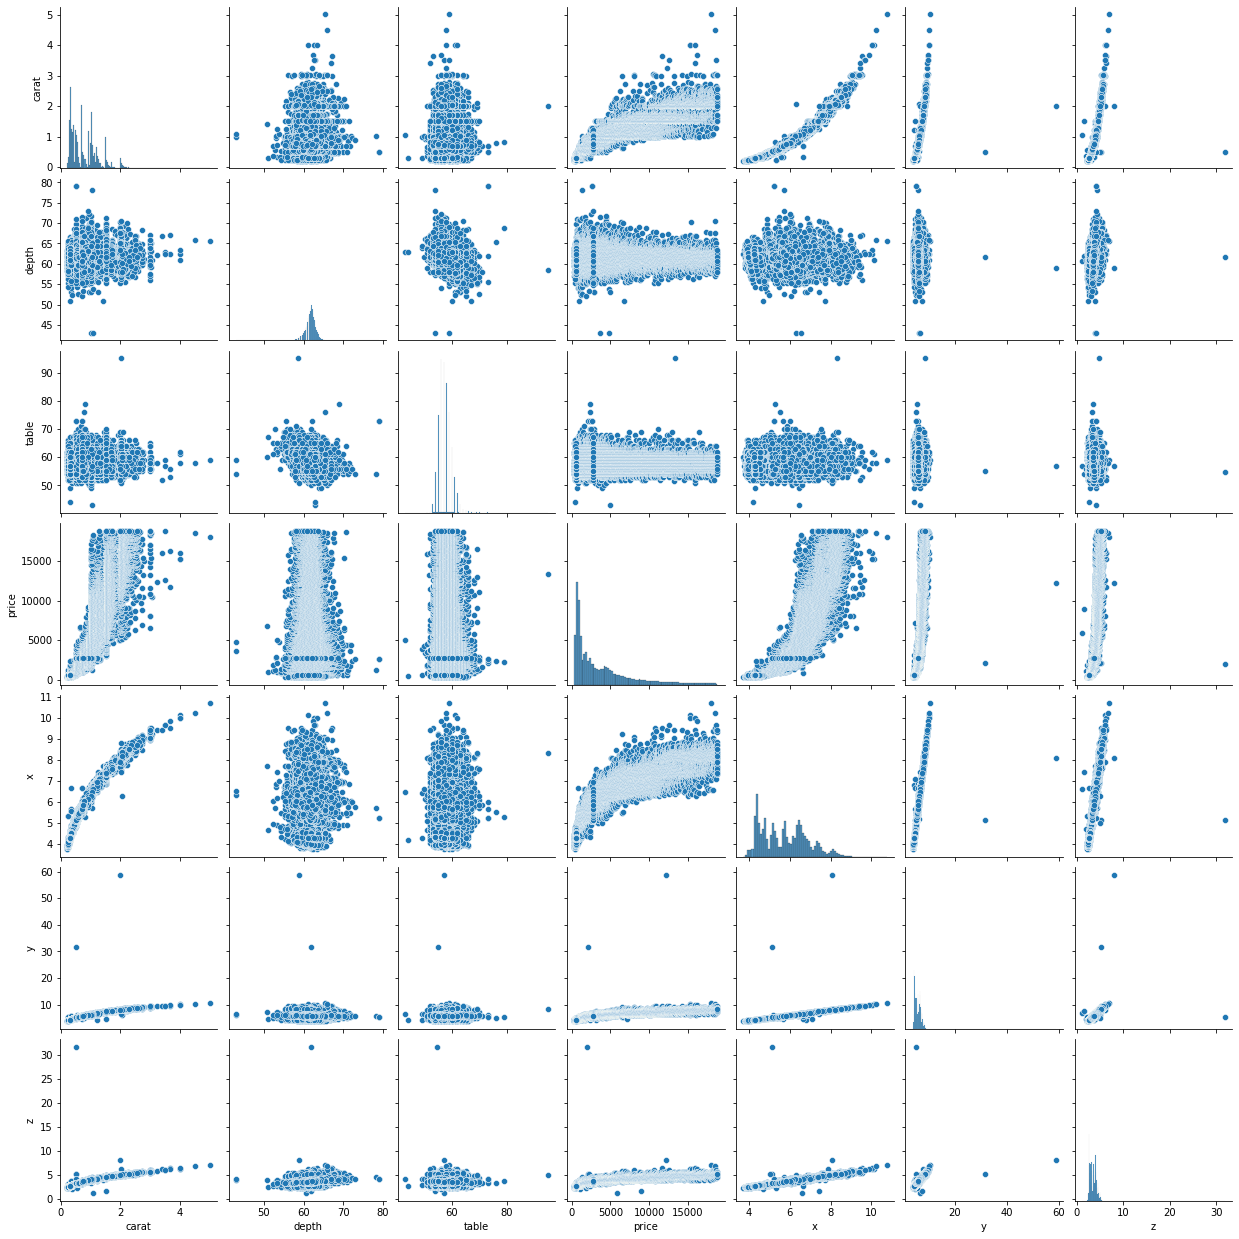

In [6]:
sns.pairplot(df_hist)

A maior correlação encontrada é do preço em função do quilate.

#### Explorando mais a relação preço em função do quilate

<AxesSubplot:xlabel='carat', ylabel='price'>

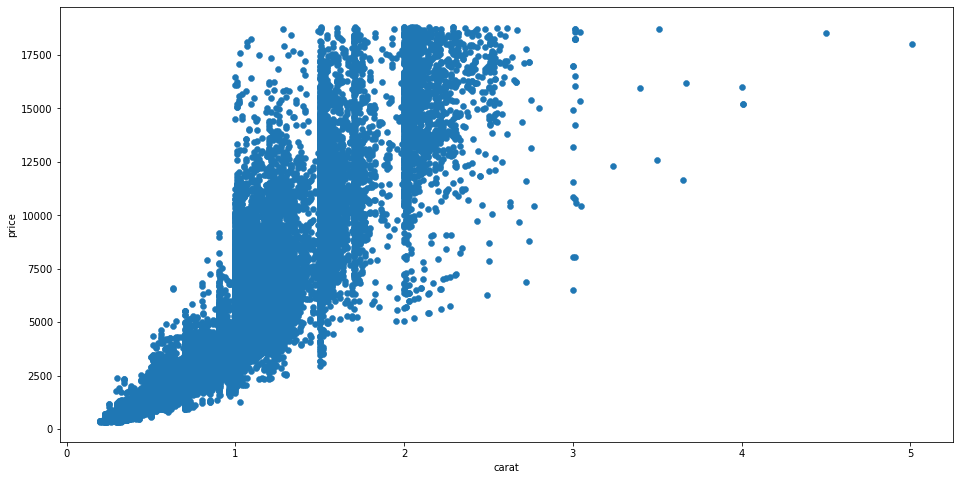

In [7]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price', edgecolor = None)

Visualizando em relação as cores:

<AxesSubplot:xlabel='carat', ylabel='price'>

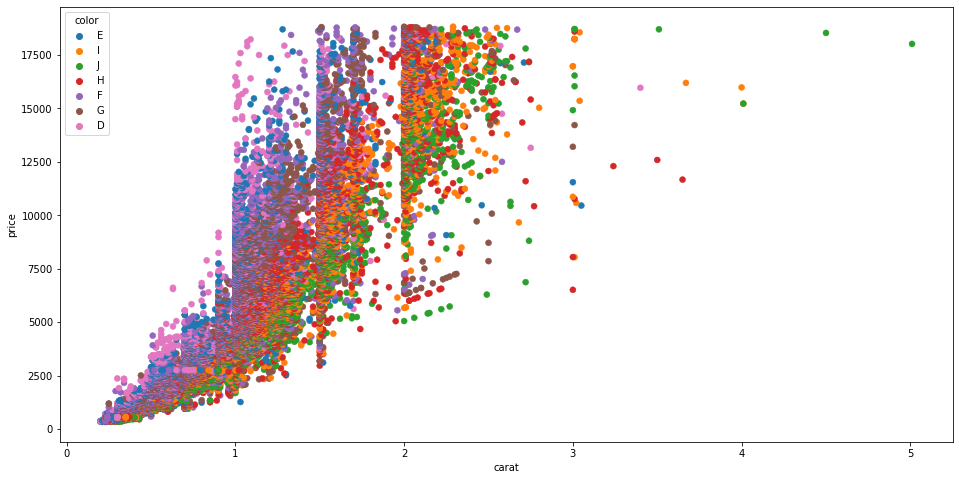

In [8]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price', hue='color', edgecolor = None)

Visualizando em relação a claridade:

<AxesSubplot:xlabel='carat', ylabel='price'>

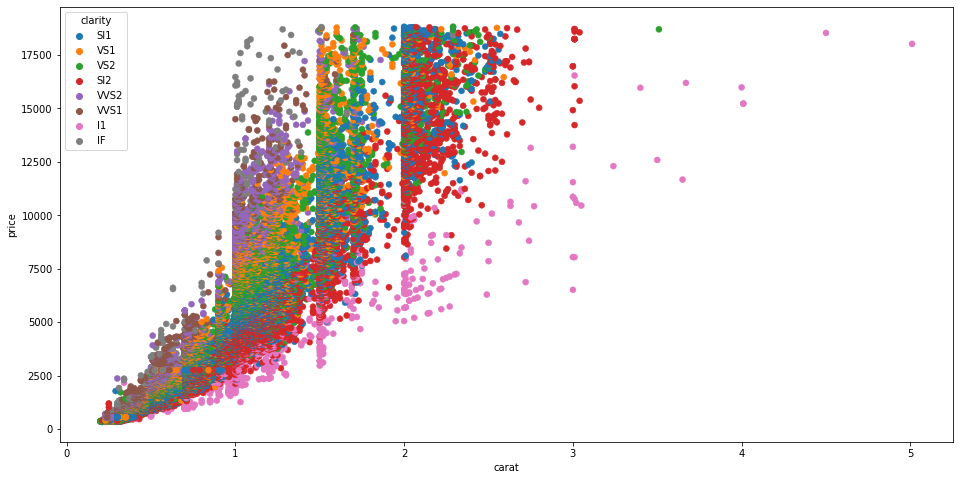

In [9]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price', hue='clarity', edgecolor = None)

visualizando em relação ao corte:

<AxesSubplot:xlabel='carat', ylabel='price'>

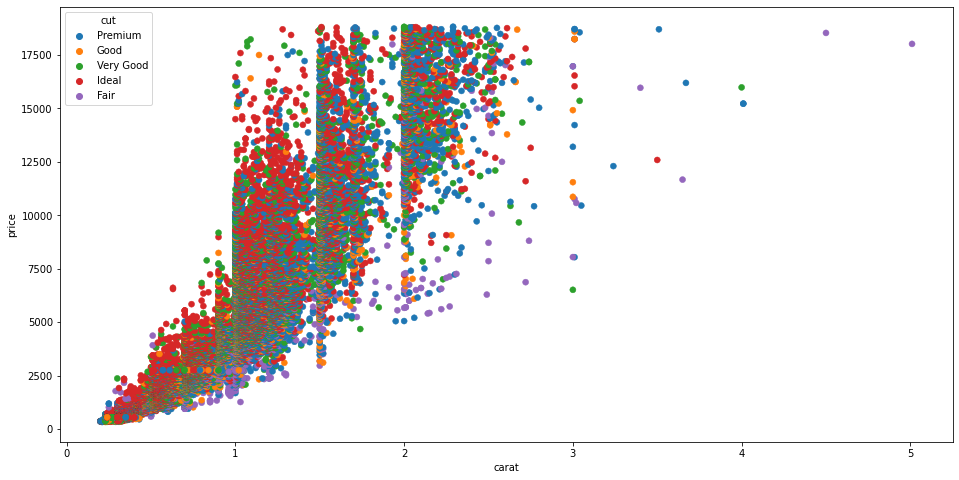

In [10]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price', hue='cut', edgecolor = None)

#### Transformação para base logarítmica:

In [11]:
df_hist['carat_log'] = np.log(df_hist['carat'])
df_hist['price_log'] = np.log(df_hist['price'])
df_hist

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log,price_log
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,-1.427116,5.817111
...,...,...,...,...,...,...,...,...,...,...,...,...
48917,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,-0.328504,7.921898
48918,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504,7.921898
48919,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504,7.921898
48920,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675,7.921898


<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

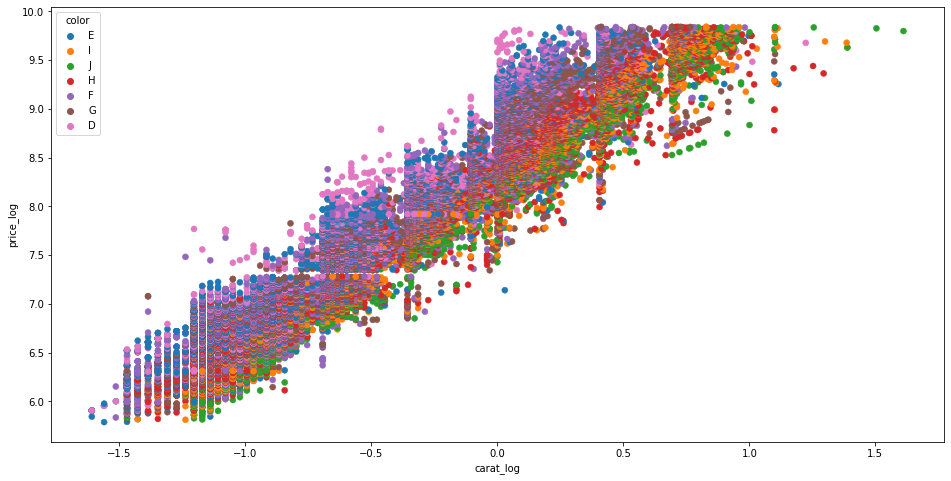

In [12]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat_log', y='price_log', hue='color', edgecolor = None)

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

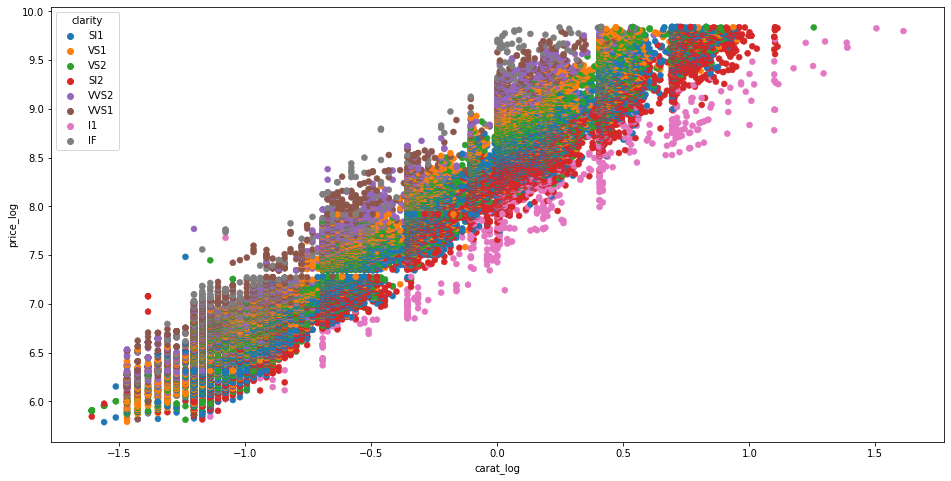

In [13]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat_log', y='price_log', hue='clarity', edgecolor = None)

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

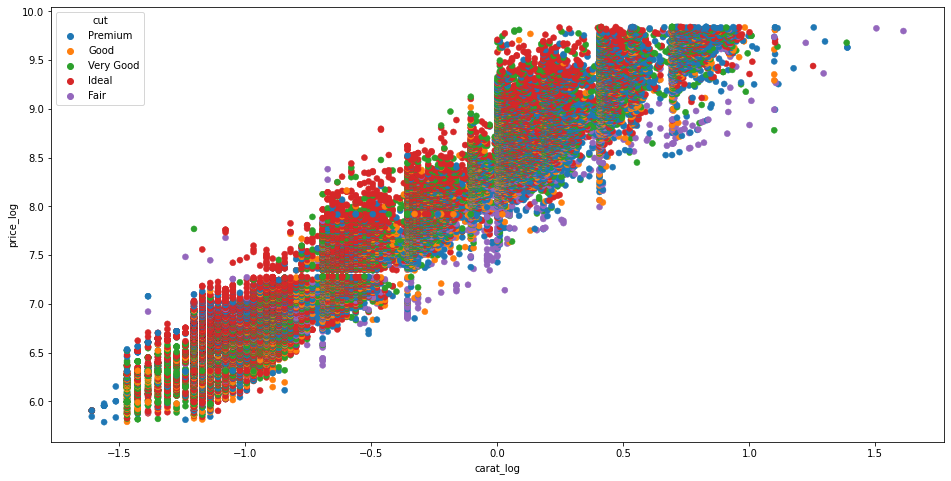

In [14]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat_log', y='price_log', hue='cut', edgecolor = None)

#### Criação de colunas numéricas para traduzir as colunas categóricas de cut, color e clarity

In [15]:
cut_quality = {'Fair': 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
color_quality = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
clarity_quality = {'I1':1, 'SI2' : 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

In [16]:
df_hist['cut_quality'] = df_hist['cut'].apply(lambda x: cut_quality[x])
df_hist['color_quality'] = df_hist['color'].apply(lambda x: color_quality[x])
df_hist['clarity_quality'] = df_hist['clarity'].apply(lambda x: clarity_quality[x])
df_hist

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log,price_log,cut_quality,color_quality,clarity_quality
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897,4,6,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960,2,6,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,-1.427116,5.817111,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48917,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,-0.328504,7.921898,4,7,3
48918,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504,7.921898,5,7,3
48919,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504,7.921898,2,7,3
48920,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675,7.921898,3,7,3


#### Visulizando a influência da variável clarity para uma cor específica

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

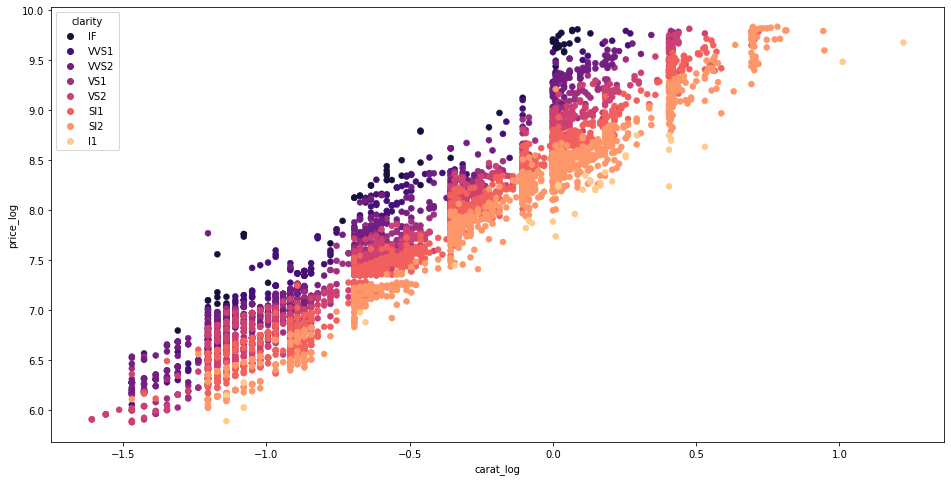

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['color']=='D'].sort_values('clarity_quality', ascending=False), x='carat_log', y='price_log', hue='clarity', edgecolor = None, palette='magma' )

---

### Regressão linear simples

Sem nenhum utilização de nenhum filtro.

In [18]:
X = df_hist[['carat']] #feature - formato de dataframe
Y = df_hist['price'] #target - formato de série

In [19]:
model = LinearRegression()

In [20]:
model.fit(X, Y)

LinearRegression()

In [21]:
model.coef_

array([7758.52467723])

In [22]:
model.intercept_

-2255.5017549613162

In [23]:
predict_price = model.predict(X)

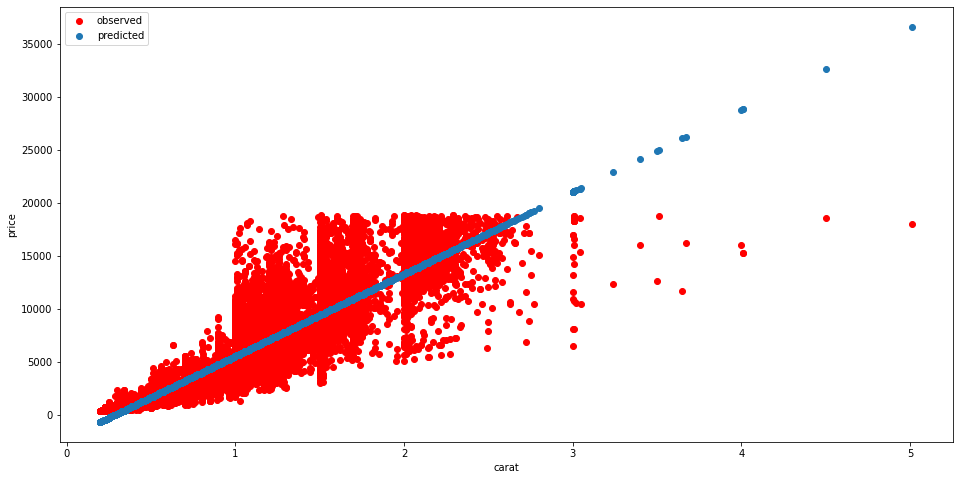

In [24]:
plt.figure(figsize=(16,8))
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(X, Y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(X, predict_price, label='predicted')


plt.legend();

In [25]:
np.sqrt(mean_squared_error(Y, model.predict(X)))

1541.994710626386

---

## Modelo para cada cor

uma regressão linear para cada uma das cores, utilizando como variável independente o carat_log, cut_quality e clarity_quality para encontrar o valor de price_log.

In [26]:
#separando os dataframes para cada cor
df_hist1 = df_hist[df_hist['color'] == 'D']
df_hist2 = df_hist[df_hist['color'] == 'E']
df_hist3 = df_hist[df_hist['color'] == 'F']
df_hist4 = df_hist[df_hist['color'] == 'G']
df_hist5 = df_hist[df_hist['color'] == 'H']
df_hist6 = df_hist[df_hist['color'] == 'I']
df_hist7 = df_hist[df_hist['color'] == 'J']

In [27]:
df_hist1['group'] = df_hist1['carat'].apply(lambda x: 1 if(x <= 0.90) else 0)
df_hist2['group'] = df_hist2['carat'].apply(lambda x: 1 if(x <= 0.90) else 0)
df_hist3['group'] = df_hist3['carat'].apply(lambda x: 1 if(x <= 1.1) else 0)
df_hist4['group'] = df_hist4['carat'].apply(lambda x: 1 if(x <= 1.04) else 0)
df_hist5['group'] = df_hist5['carat'].apply(lambda x: 1 if(x <= 1.20) else 0)
df_hist6['group'] = df_hist6['carat'].apply(lambda x: 1 if(x <= 1.50) else 0)
df_hist7['group'] = df_hist7['carat'].apply(lambda x: 1 if(x <= 1.52) else 0)

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [28]:
#valores de X e Y de cada uma dos dataframes
X1 = df_hist1[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
Y1 = df_hist1['price_log']

X2 = df_hist2[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
Y2 = df_hist2['price_log']

X3 = df_hist3[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
Y3 = df_hist3['price_log']

X4 = df_hist4[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
Y4 = df_hist4['price_log']

X5 = df_hist5[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
Y5 = df_hist5['price_log']

X6 = df_hist6[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
Y6 = df_hist6['price_log']

X7 = df_hist7[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
Y7 = df_hist7['price_log']

In [29]:
df_hist1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log,price_log,cut_quality,color_quality,clarity_quality,group
26,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40,-1.469676,5.877736,3,7,4,1
32,0.23,Very Good,D,VS1,61.9,58.0,402,3.92,3.96,2.44,-1.469676,5.996452,3,7,5,1
36,0.26,Very Good,D,VS2,60.8,59.0,403,4.13,4.16,2.52,-1.347074,5.998937,3,7,4,1
40,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61,-1.347074,5.998937,2,7,4,1
41,0.26,Good,D,VS1,58.4,63.0,403,4.19,4.24,2.46,-1.347074,5.998937,2,7,5,1


In [30]:
#regressão de múltiplas variáveis
#variáveis independentes: carat_log, cut_quality e clarity_quality
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()
model7 = LinearRegression()

model1.fit(X1, Y1)
model2.fit(X2, Y2)
model3.fit(X3, Y3)
model4.fit(X4, Y4)
model5.fit(X5, Y5)
model6.fit(X6, Y6)
model7.fit(X7, Y7)

LinearRegression()

In [31]:
model1.coef_[1]

0.03741618931186453

In [32]:
model1.coef_

array([ 1.80949122,  0.03741619,  0.17946102, -0.11850525])

In [33]:
#calculo do preço previsto
df_hist1['predict_price'] = np.exp(model1.predict(X1)) #já coverte o valor calculo de price_log para price
df_hist2['predict_price'] = np.exp(model2.predict(X2))
df_hist3['predict_price'] = np.exp(model3.predict(X3))
df_hist4['predict_price'] = np.exp(model4.predict(X4))
df_hist5['predict_price'] = np.exp(model5.predict(X5))
df_hist6['predict_price'] = np.exp(model6.predict(X6))
df_hist7['predict_price'] = np.exp(model7.predict(X7))

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

#### cálculo do  erro quadrático médio para cada um dos modelos:

In [34]:
np.sqrt(mean_squared_error(df_hist1['price'], df_hist1['predict_price']))

712.7714712158341

In [35]:
np.sqrt(mean_squared_error(df_hist2['price'], df_hist2['predict_price']))

646.7574430824557

In [36]:
np.sqrt(mean_squared_error(df_hist3['price'], df_hist3['predict_price']))

709.4859922479993

In [37]:
np.sqrt(mean_squared_error(df_hist4['price'], df_hist4['predict_price']))

793.631572526944

In [38]:
np.sqrt(mean_squared_error(df_hist5['price'], df_hist5['predict_price']))

1007.6444641420647

In [39]:
np.sqrt(mean_squared_error(df_hist6['price'], df_hist6['predict_price']))

1092.4549736185984

In [40]:
np.sqrt(mean_squared_error(df_hist7['price'], df_hist7['predict_price']))

1200.6761130680468

Os modelos 5, 6 e 7 foram os que apresentaram o RMSE acima de 1000.

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

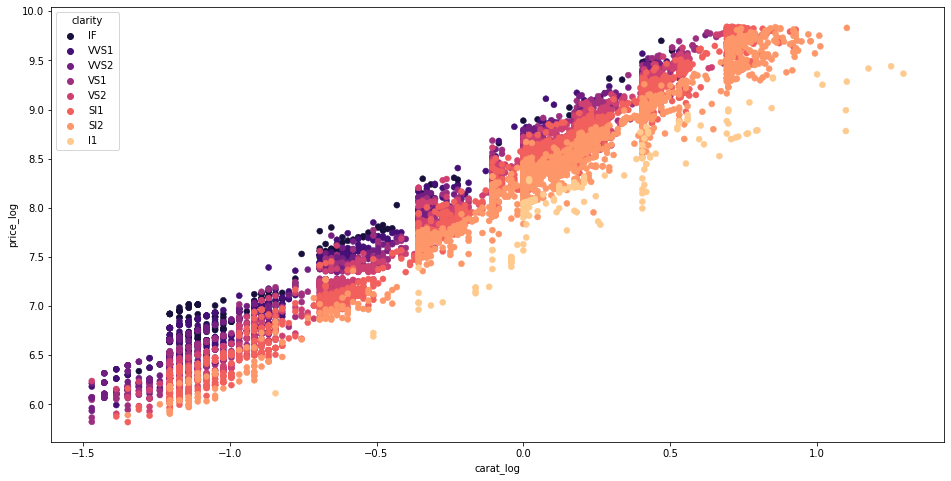

In [41]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist5.sort_values('clarity_quality', ascending=False), x='carat_log', y='price_log', hue='clarity', edgecolor = None, palette='magma')

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

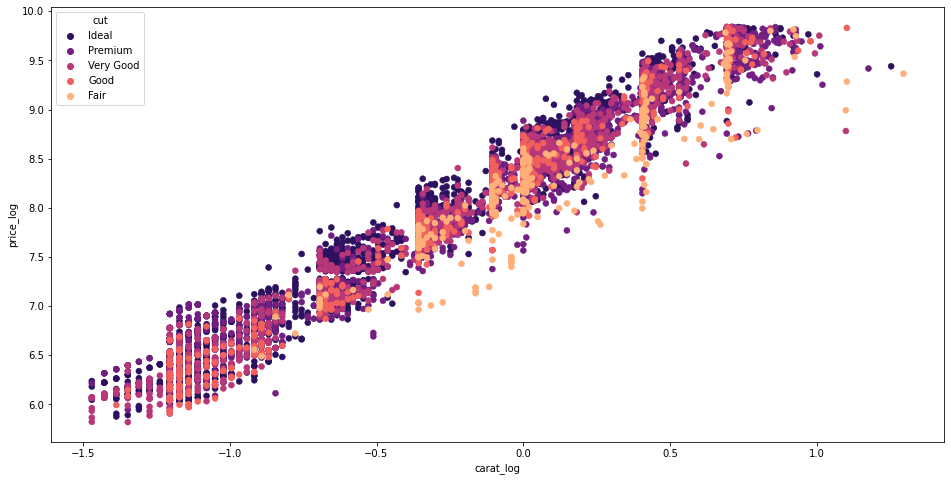

In [42]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist5.sort_values('cut_quality', ascending=False), x='carat_log', y='price_log', hue='cut', edgecolor = None, palette='magma')

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

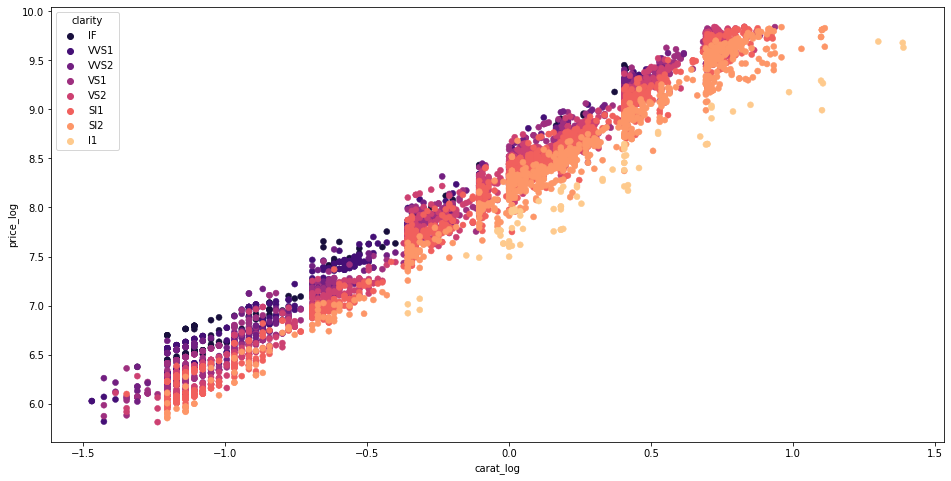

In [43]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist6.sort_values('clarity_quality', ascending=False), x='carat_log', y='price_log', hue='clarity', edgecolor = None, palette='magma')

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

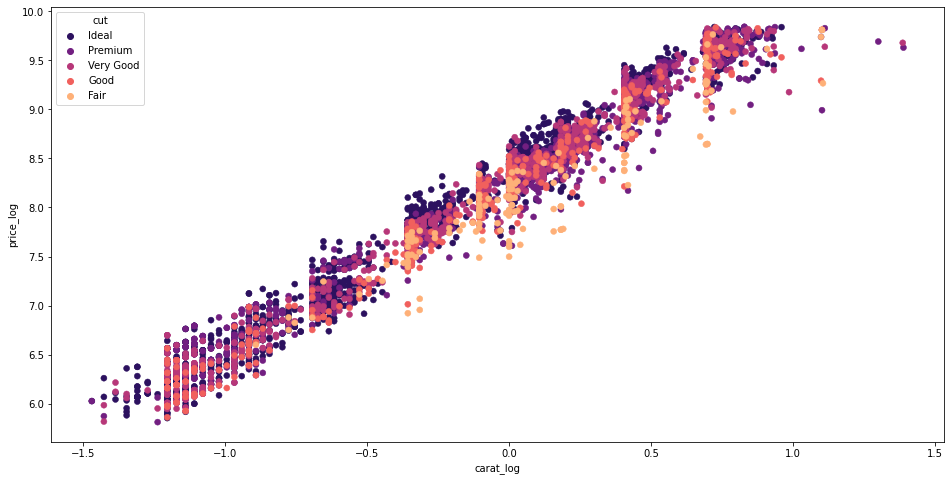

In [44]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist6.sort_values('cut_quality', ascending=False), x='carat_log', y='price_log', hue='cut', edgecolor = None, palette='magma')

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

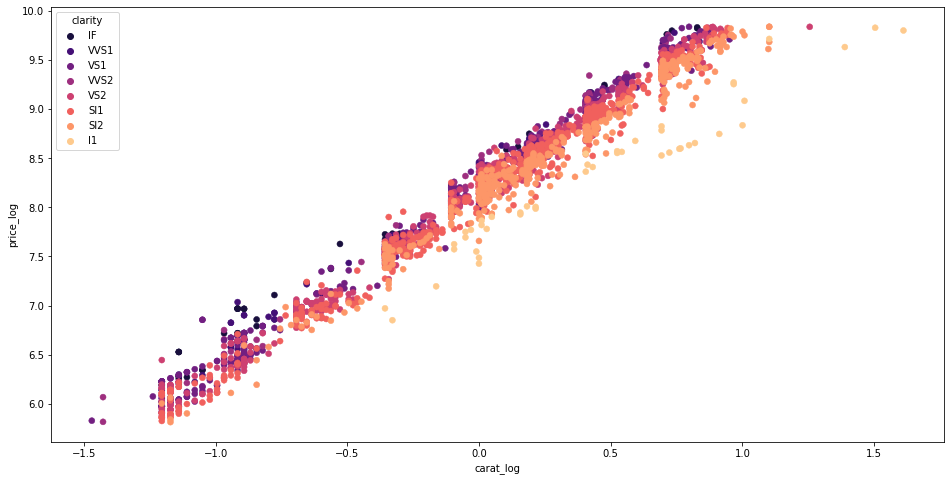

In [45]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist7.sort_values('clarity_quality', ascending=False), x='carat_log', y='price_log', hue='clarity', edgecolor = None, palette='magma')

<AxesSubplot:xlabel='carat_log', ylabel='price_log'>

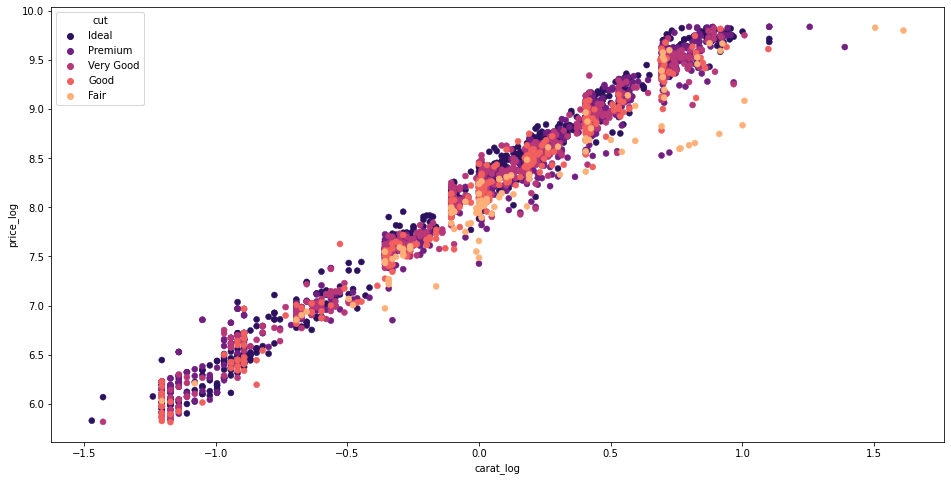

In [46]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist7.sort_values('cut_quality', ascending=False), x='carat_log', y='price_log', hue='cut', edgecolor = None, palette='magma')

In [47]:
#concatenando os dataframes novamente em apenas 1
df_hist_all = pd.concat([df_hist1, df_hist2, df_hist3, df_hist4, df_hist5, df_hist6, df_hist7])
df_hist_all

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_log,price_log,cut_quality,color_quality,clarity_quality,group,predict_price
26,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40,-1.469676,5.877736,3,7,4,1,392.121935
32,0.23,Very Good,D,VS1,61.9,58.0,402,3.92,3.96,2.44,-1.469676,5.996452,3,7,5,1,469.202228
36,0.26,Very Good,D,VS2,60.8,59.0,403,4.13,4.16,2.52,-1.347074,5.998937,3,7,4,1,489.517727
40,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61,-1.347074,5.998937,2,7,4,1,471.540260
41,0.26,Good,D,VS1,58.4,63.0,403,4.19,4.24,2.46,-1.347074,5.998937,2,7,5,1,564.231993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48698,0.90,Premium,J,SI2,63.0,59.0,2717,6.14,6.11,3.86,-0.105361,7.907284,4,1,2,1,2534.994770
48782,0.90,Good,J,SI1,63.2,60.0,2729,6.09,6.12,3.86,-0.105361,7.911691,2,1,3,1,2598.949881
48837,0.82,Ideal,J,VS2,61.6,56.0,2741,6.00,6.04,3.71,-0.198451,7.916078,5,1,4,1,2570.659148
48840,0.83,Ideal,J,VS2,62.3,55.0,2742,6.01,6.03,3.75,-0.186330,7.916443,5,1,4,1,2628.639103


#### cálculo do erro quadrático médio para todo o histórico

In [48]:
np.sqrt(mean_squared_error(df_hist_all['price'], df_hist_all['predict_price']))

843.5884391774508

# Aplicação do modelo para calcular os preços do dataset do Rick

In [49]:
#importando dataset
df_rick = pd.read_csv('data/rick_diamonds.csv', sep=',')
df_rick

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71


In [50]:
#criando as variáveis independentes de qualidade utilizadas para modelo
df_rick['cut_quality'] = df_rick['cut'].apply(lambda x: cut_quality[x])
df_rick['color_quality'] = df_rick['color'].apply(lambda x: color_quality[x])
df_rick['clarity_quality'] = df_rick['clarity'].apply(lambda x: clarity_quality[x])
df_rick['carat_log'] = np.log(df_rick['carat'])
df_rick

,carat,cut,color,clarity,depth,table,x,y,z,cut_quality,color_quality,clarity_quality,carat_log
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2,-0.094311
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4,-0.967584
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4,-0.653926
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,0.095310
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2,0.824175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2,-1.203973
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,5,-0.673345
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3,0.009950
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,6,-1.171183


In [51]:
#separando o dataset de acordo com cor do diamante
df_rick1 = df_rick[df_rick['color'] == 'D']
df_rick2 = df_rick[df_rick['color'] == 'E']
df_rick3 = df_rick[df_rick['color'] == 'F']
df_rick4 = df_rick[df_rick['color'] == 'G']
df_rick5 = df_rick[df_rick['color'] == 'H']
df_rick6 = df_rick[df_rick['color'] == 'I']
df_rick7 = df_rick[df_rick['color'] == 'J']

In [52]:
df_rick1['group'] = df_rick1['carat'].apply(lambda x: 1 if(x <= 0.90) else 0)
df_rick2['group'] = df_rick2['carat'].apply(lambda x: 1 if(x <= 0.90) else 0)
df_rick3['group'] = df_rick3['carat'].apply(lambda x: 1 if(x <= 1.1) else 0)
df_rick4['group'] = df_rick4['carat'].apply(lambda x: 1 if(x <= 1.04) else 0)
df_rick5['group'] = df_rick5['carat'].apply(lambda x: 1 if(x <= 1.20) else 0)
df_rick6['group'] = df_rick6['carat'].apply(lambda x: 1 if(x <= 1.50) else 0)
df_rick7['group'] = df_rick7['carat'].apply(lambda x: 1 if(x <= 1.52) else 0)

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [53]:
#separando os inputs para cálculo do preço
x1 = df_rick1[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
x2 = df_rick2[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
x3 = df_rick3[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
x4 = df_rick4[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
x5 = df_rick5[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
x6 = df_rick6[['carat_log', 'cut_quality', 'clarity_quality', 'group']]
x7 = df_rick7[['carat_log', 'cut_quality', 'clarity_quality', 'group']]

In [54]:
#cálculo do preço
df_rick1['price_predicted'] = np.exp(model1.predict(x1))
df_rick2['price_predicted'] = np.exp(model2.predict(x2))
df_rick3['price_predicted'] = np.exp(model3.predict(x3))
df_rick4['price_predicted'] = np.exp(model4.predict(x4))
df_rick5['price_predicted'] = np.exp(model5.predict(x5))
df_rick6['price_predicted'] = np.exp(model6.predict(x6))
df_rick7['price_predicted'] = np.exp(model7.predict(x7))

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [55]:
#concatenando novamente em apenas um df
df_rick_all = pd.concat([df_rick1, df_rick2, df_rick3, df_rick4, df_rick5, df_rick6, df_rick7])
df_rick_all

,carat,cut,color,clarity,depth,table,x,y,z,cut_quality,color_quality,clarity_quality,carat_log,group,price_predicted
10,1.00,Good,D,VS2,64.1,58.0,6.24,6.33,4.03,2,7,4,0.000000,0,6075.549253
13,0.33,Ideal,D,VS2,61.9,53.0,4.49,4.46,2.77,5,7,4,-1.108663,1,812.126168
14,0.51,Fair,D,VS2,64.4,54.0,5.06,5.03,3.25,1,7,4,-0.673345,1,1537.165134
24,1.26,Premium,D,SI2,61.9,58.0,6.88,6.81,4.24,4,7,2,0.231112,0,6947.468672
28,0.41,Premium,D,VVS2,62.2,58.0,4.80,4.78,2.98,4,7,5,-0.891598,1,1386.415405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,1.00,Fair,J,SI2,56.3,64.0,6.58,6.54,3.69,1,1,2,0.000000,1,2837.156215
4946,0.91,Good,J,VS2,61.3,61.0,6.18,6.25,3.81,2,1,4,-0.094311,1,2870.618909
4967,1.00,Ideal,J,SI1,59.2,62.0,6.47,6.50,3.84,5,1,3,0.000000,1,3422.030867
4973,1.21,Ideal,J,SI1,61.9,54.0,6.85,6.88,4.25,5,1,3,0.190620,1,4859.741805


In [56]:
#reordenando pelo index
df_rick_all.sort_index(inplace=True)
df_rick_all

,carat,cut,color,clarity,depth,table,x,y,z,cut_quality,color_quality,clarity_quality,carat_log,group,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2,-0.094311,1,2996.710771
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4,-0.967584,1,831.178332
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4,-0.653926,1,1443.147333
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,0.095310,0,7514.509470
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2,0.824175,0,18919.137684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2,-1.203973,1,442.941791
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,5,-0.673345,1,1896.000635
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3,0.009950,1,4713.698630
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,6,-1.171183,1,864.165910


In [57]:
#dropando as colunas criadas para cálculo para deixar no padrão para submeter o arquivo no site
df_rick_all.drop(columns=['carat_log', 'cut_quality', 'clarity_quality', 'color_quality', 'group'], inplace=True)
df_rick_all

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2996.710771
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,831.178332
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1443.147333
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7514.509470
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,18919.137684
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,442.941791
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,1896.000635
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,4713.698630
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,864.165910


In [58]:
#exportando o dataset para csv
df_rick_all.to_csv('data/rick_predicted1b.csv', sep=',')

## RMSE dos diamantes do Rick:

# 967.3836749777349
https://daft-oct2020-rick-diamonds.herokuapp.com/